In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

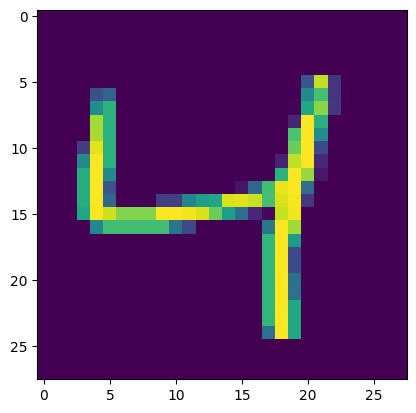

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train[0]
#here if we see the values are between 0 and 255, inorder to make the values between 0 to 1 we divide by the max value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#artificial neural network

model = Sequential()

#we have data in the form of 28*28, so first we have to flatten that data, ie from 2d to side by side
model.add(Flatten(input_shape=(28,28))) #input layer

model.add(Dense(128,activation='relu')) #hidden layer1
model.add(Dense(32,activation='relu')) #hidden layer2
model.add(Dense(10,activation='softmax')) #output layer , we used softmax as we have more than 1 output node

C:\Users\Srivalli\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

#28*28=784
#784*128 nodes +128 bias =100480


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#we can use categorical_crossentropy also as loss func but for sparse_categorical_crossentropy one hot encoding is not required

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8499 - loss: 0.4921 - val_accuracy: 0.9575 - val_loss: 0.1421
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9622 - loss: 0.1277 - val_accuracy: 0.9672 - val_loss: 0.1079
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9759 - loss: 0.0823 - val_accuracy: 0.9690 - val_loss: 0.1029
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9819 - loss: 0.0597 - val_accuracy: 0.9724 - val_loss: 0.0965
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9722 - val_loss: 0.0943
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.9725 - val_loss: 0.0968
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9758 - val_loss: 0.0932
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9923 - loss: 0

In [13]:
model.predict(X_test)
#the probability of being 0,1,2....9

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[5.3475247e-19, 1.2151750e-17, 8.2107282e-16, ..., 1.0000000e+00,
        1.0993566e-18, 4.3250358e-15],
       [4.9252729e-22, 5.6526122e-13, 1.0000000e+00, ..., 1.9952352e-22,
        5.7373472e-17, 2.9143115e-30],
       [7.1855858e-14, 1.0000000e+00, 4.9379922e-10, ..., 7.1638279e-10,
        1.5408038e-08, 1.4284832e-15],
       ...,
       [1.0212627e-27, 5.3225565e-18, 7.1931281e-29, ..., 1.1094483e-15,
        4.1405530e-16, 5.2726318e-10],
       [3.2305629e-24, 6.4599213e-20, 2.1420204e-30, ..., 3.5479512e-20,
        5.2434896e-13, 8.1225016e-24],
       [5.7507987e-14, 2.4365031e-23, 1.3799321e-20, ..., 3.1308896e-27,
        2.5311908e-19, 2.1406320e-22]], dtype=float32)

In [14]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)
#here we r finding the max probability so that , the given image is of that number

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9772

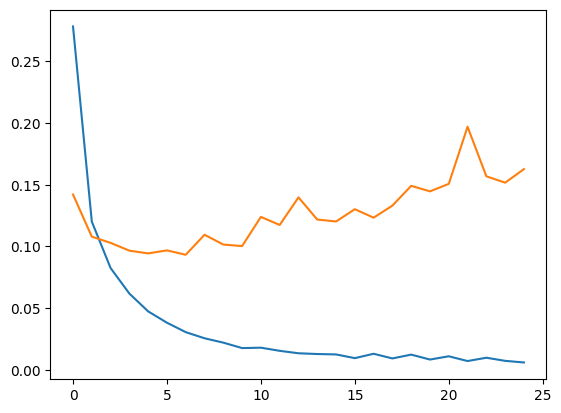

In [17]:
plt.plot(history.history['loss']) #as epochs are increasing training loss is decreasing
plt.plot(history.history['val_loss'])

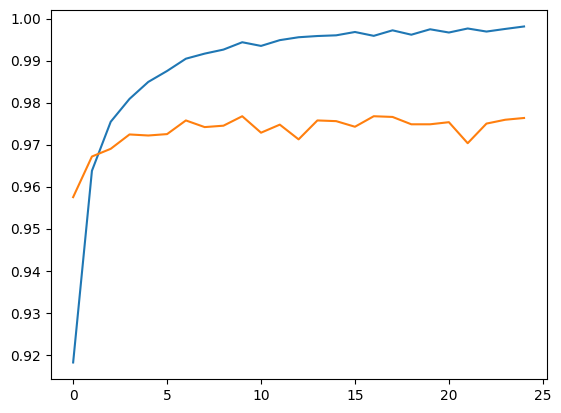

In [18]:
plt.plot(history.history['accuracy']) #as the epochs increase the training accuracy reached 100
plt.plot(history.history['val_accuracy'])

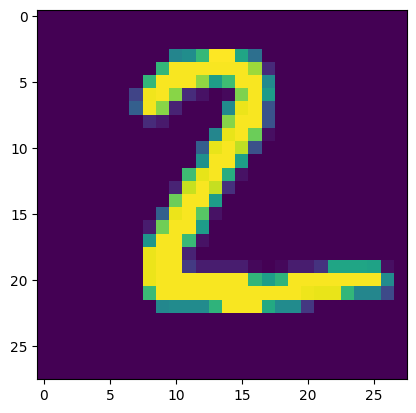

In [19]:
plt.imshow(X_test[1])

In [20]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([2])

In [25]:
import pandas as pd
import numpy as np

# Get model predictions
y_pred = model.predict(X_test)

# Convert model output probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is already 1D (not one-hot), no need for argmax
y_true_classes = y_test  # just use it directly

# Create a DataFrame to compare
comparison_df = pd.DataFrame({
    'Actual Label': y_true_classes,
    'Predicted Label': y_pred_classes
})

# Optional: Add correctness column
comparison_df['Correct'] = comparison_df['Actual Label'] == comparison_df['Predicted Label']

# Display first 20 comparisons
print(comparison_df.head(20))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
    Actual Label  Predicted Label  Correct
0              7                7     True
1              2                2     True
2              1                1     True
3              0                0     True
4              4                4     True
5              1                1     True
6              4                4     True
7              9                9     True
8              5                6    False
9              9                9     True
10             0                0     True
11             6                6     True
12             9                9     True
13             0                0     True
14             1                1     True
15             5                5     True
16             9                9     True
17             7                7     True
18             3                3     True
19             4                4     True
